### Q-1.
Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [45]:
import numpy as np    
import pandas as pd    

# Graph plotting library
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re

In [4]:
df = pd.read_csv(r"C:\Users\Balodi\Downloads\instagram_reach.csv")

In [5]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [6]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
# Basic analysis 

In [8]:
df.shape

(100, 8)

In [9]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [11]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [14]:
#  Data preprocessing part-1

In [16]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [19]:
# statisticl analysis

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,8.94,6.639064,0.0,4.00,8.0,12.25,26.0
S.No,100.0,16.24,7.384286,1.0,10.75,16.5,22.25,30.0
Followers,100.0,961.96,1014.625670,11.0,252.75,612.0,1197.00,4496.0
Likes,100.0,46.48,55.086980,8.0,19.00,29.0,46.00,349.0


In [21]:
df['USERNAME'].nunique()

95

In [22]:
df[df['Caption'].duplicated()]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
67,5,17,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
72,10,25,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
79,6,11,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
85,12,23,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
89,2,12,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


In [23]:
# EDA

<Axes: >

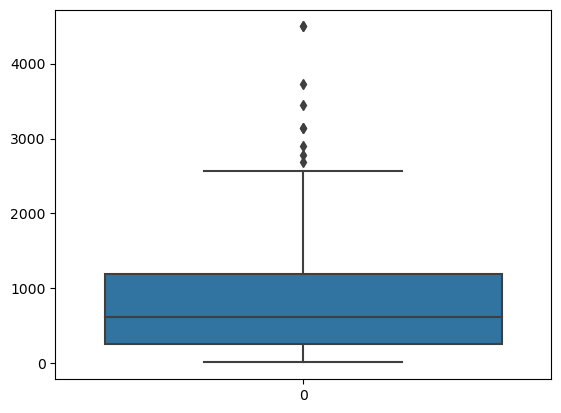

In [24]:
sns.boxplot(df['Followers'])

<Axes: xlabel='Followers', ylabel='Density'>

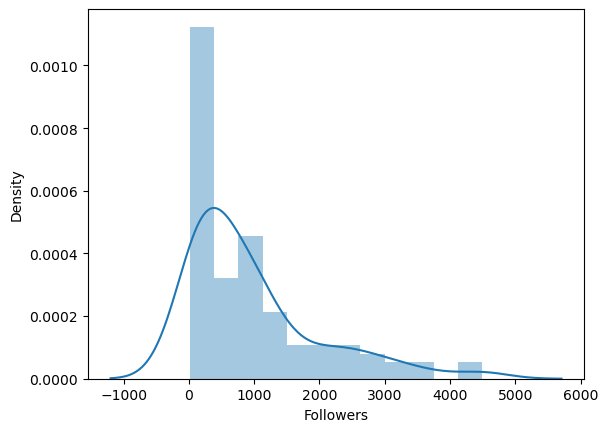

In [25]:
sns.distplot(df['Followers'])

In [26]:
# User having maximum follower

df['Followers'].max()

4496

In [29]:
df[df['Followers']==4496]['USERNAME']

23    mikequindazzi
59    mikequindazzi
Name: USERNAME, dtype: object

In [30]:
# User having minimum follower

df['Followers'].min()

11

In [31]:
df[df['Followers']==11]['USERNAME']

61    oboteo.ai
Name: USERNAME, dtype: object

In [32]:
df['Hashtags'].value_counts()

#DeepLearning #MachineLearning#ArtificialIntelligence #IoT #BigData#HealthTech #IIoT #Mobile #Infographics #smartphones #AI                                                                                                                                                                                                                                                                           2
#Bitcoin #Cryptocurrency#Ethereum #stockmarket #currencytrading#digitalmarketing #litecoin #Currency #ico#token #mining #BitcoinExchange#Blockchain #money #community #crypto#CryptoExchange #fiat #forex #altcoin#stocks #profit  #investor #investment#trader#forextrader #nyse #broker #forexnews#forexanalysis                                                                                    2
#MachineLearning #AI #DataAnalytics #DataScienc #DataLake                                                                                                                                                               

### "Time since posted"

In [33]:
df['Time since posted'].value_counts()

2 hours     57
3 hours     19
4 hours     13
7 hours      3
11 hours     2
8 hours      1
9 hours      1
5 hours      1
20 hours     1
14 hours     1
24 hours     1
Name: Time since posted, dtype: int64

### Likes

<Axes: >

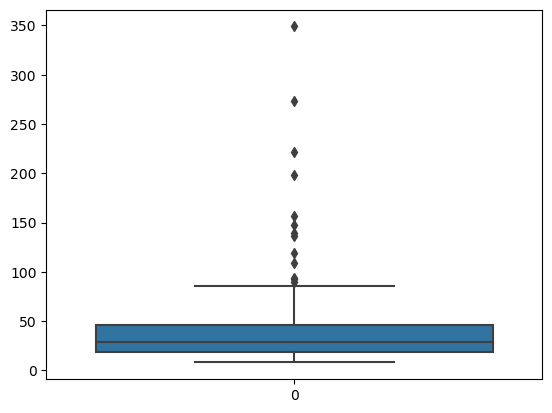

In [34]:
sns.boxplot(df['Likes'])

Text(0.5, 0, 'Likes')

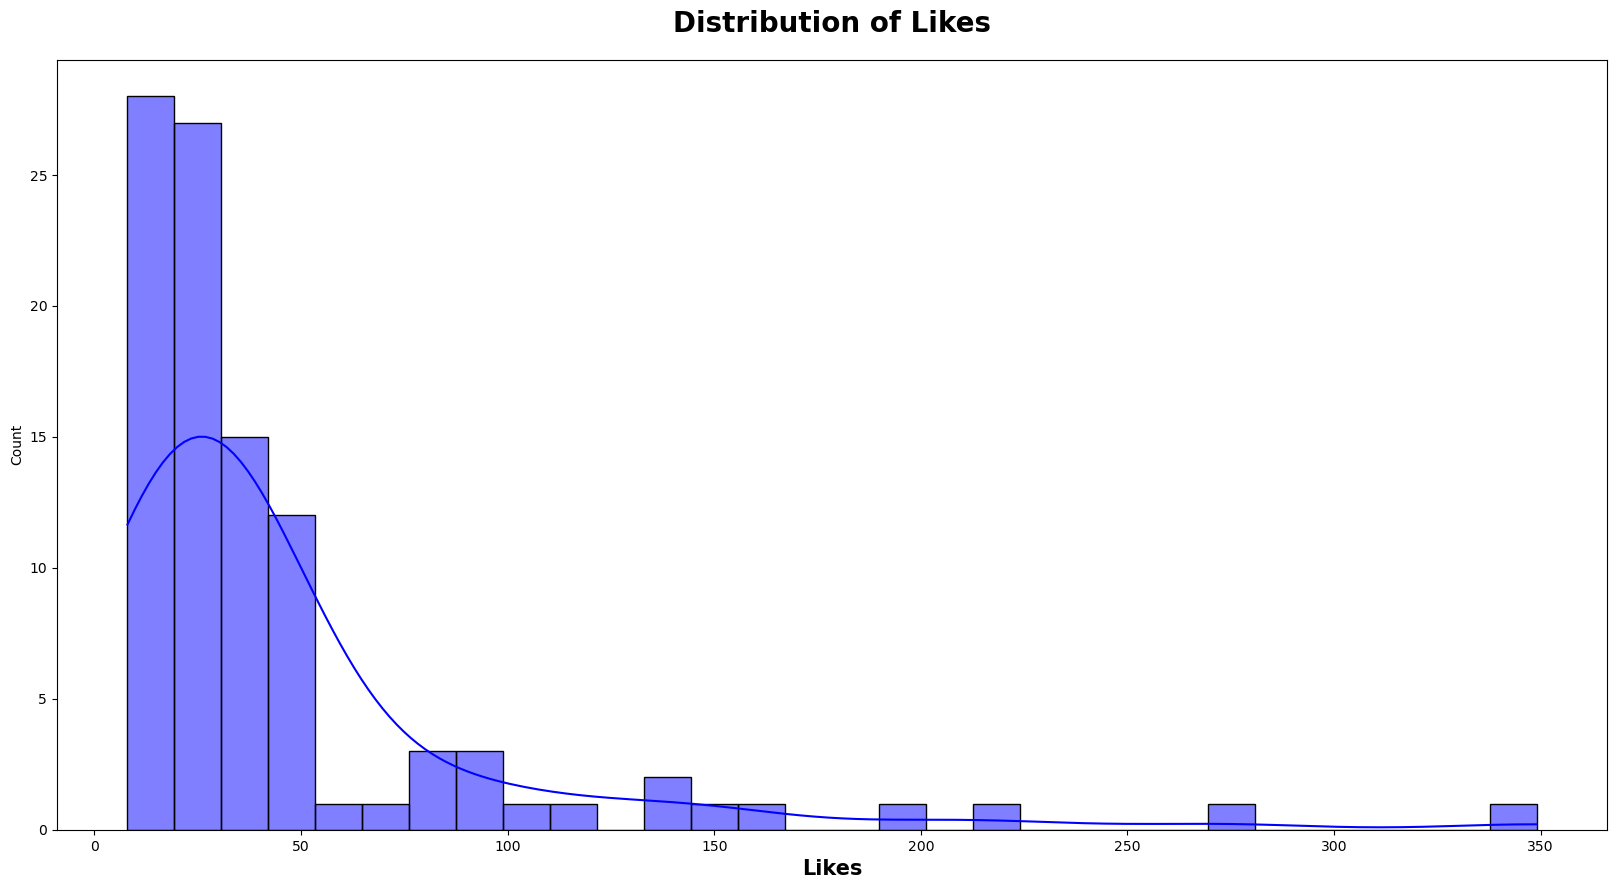

In [35]:

# Hostogram

plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Likes", x=df.Likes, color='b', kde=True)
plt.title("Distribution of Likes", weight='bold', fontsize=20, pad=20)
plt.xlabel('Likes', weight='bold', fontsize=15)

In [36]:
# User having mac=ximum like

df['Likes'].max()

349

In [37]:
df[df['Likes']==349][['USERNAME', 'Followers', 'Time since posted']]

,USERNAME,Followers,Time since posted
55,astrokpj,3448,24 hours


In [38]:
# User having minimum like

df['Likes'].min()

8

In [39]:
df[df['Likes']==8][['USERNAME', 'Followers', 'Time since posted']]

,USERNAME,Followers,Time since posted
41,ricmiqads,105,2 hours


In [40]:
df[df['Likes']==349][['Hashtags']]

,Hashtags
55,#artificialintelligence #machinelearning#bigda...


In [41]:
df[df['Likes']==8][['Hashtags']]

,Hashtags
41,#ai #artificialintelligence


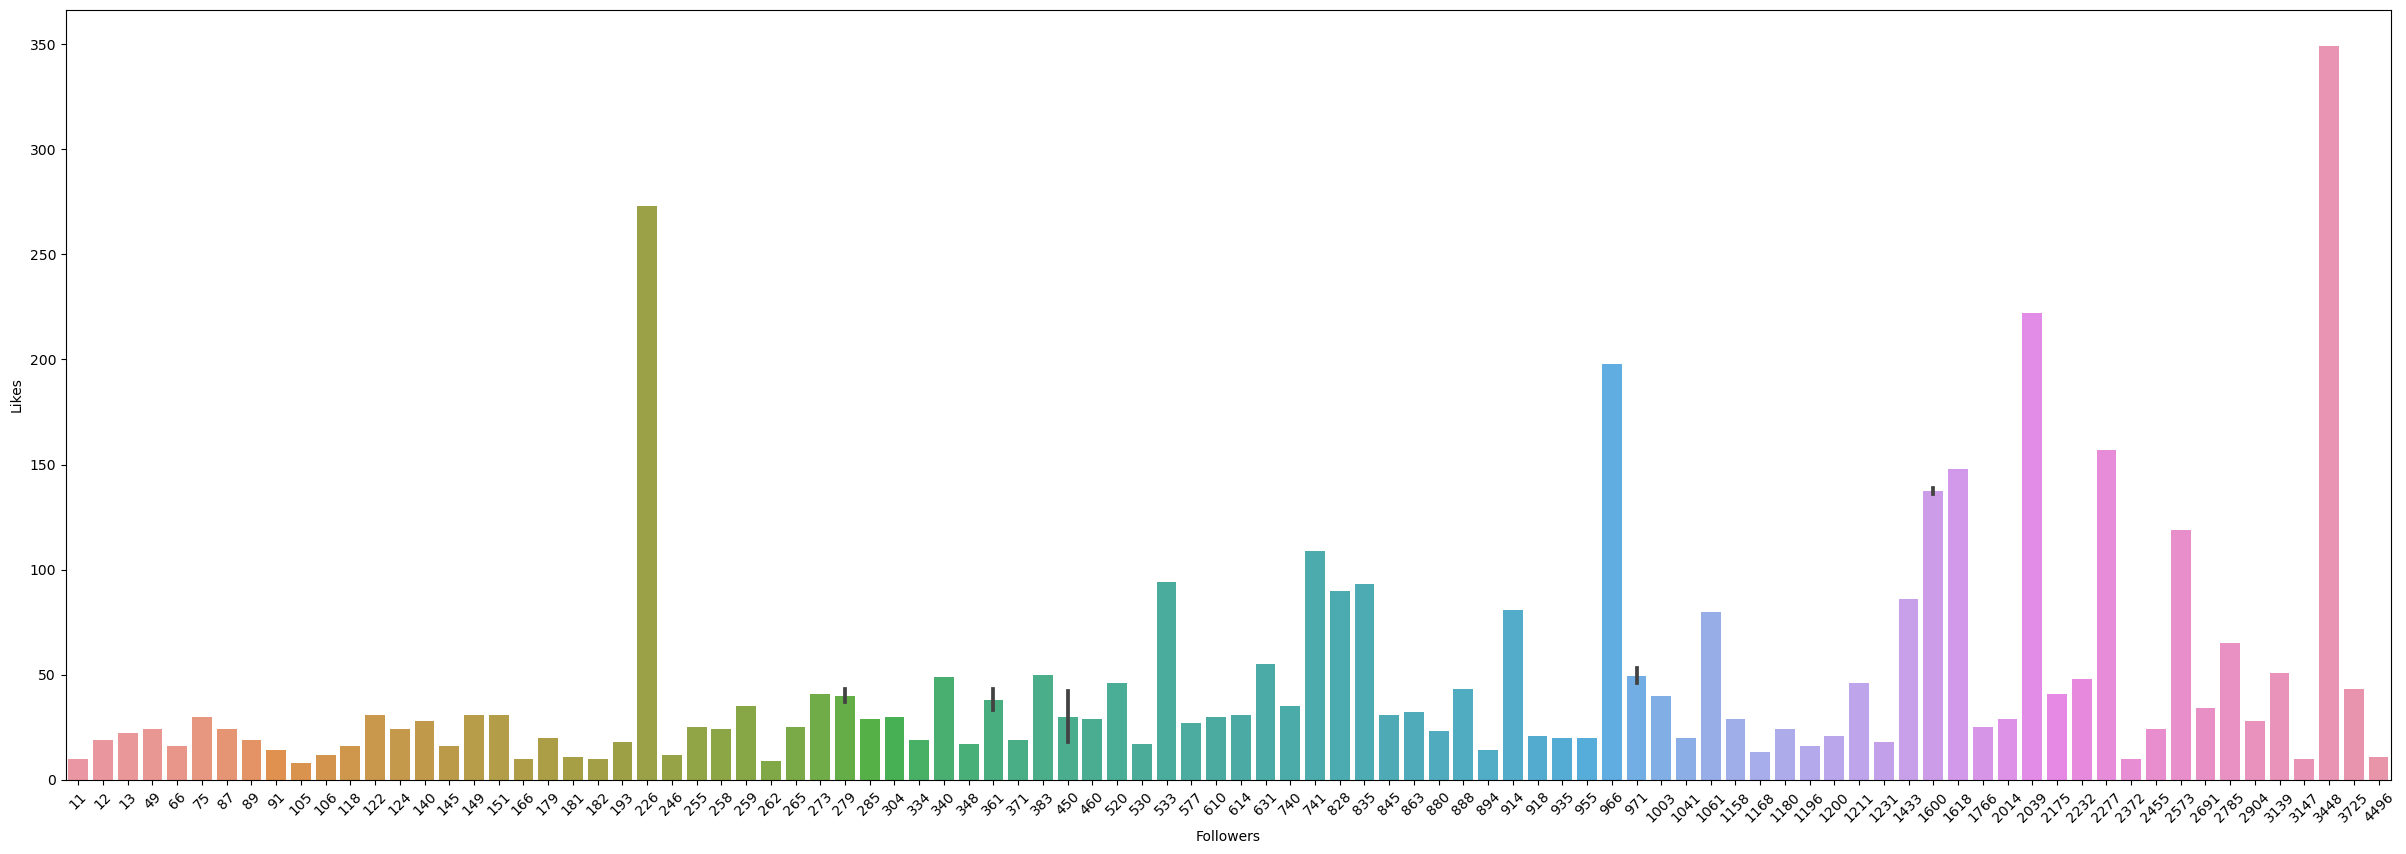

In [42]:
#Followers and Likes

# Barplot

plt.figure(figsize=(30,10))
sns.barplot(x = 'Followers',
            y = 'Likes',
            data = df)
 
# Show the plot
plt.xticks(rotation=45)
plt.show()

In [43]:
# Dropping unecssary 'S.No', 'Unnamed: 0' column

df.drop(['S.No', 'Unnamed: 0'], axis=1, inplace=True)

In [46]:
# removing hours from 'Time since posted' column and typecasting to int

df['Time since posted'] = df['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [56]:
# Function to plot scatter plot

def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = df, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

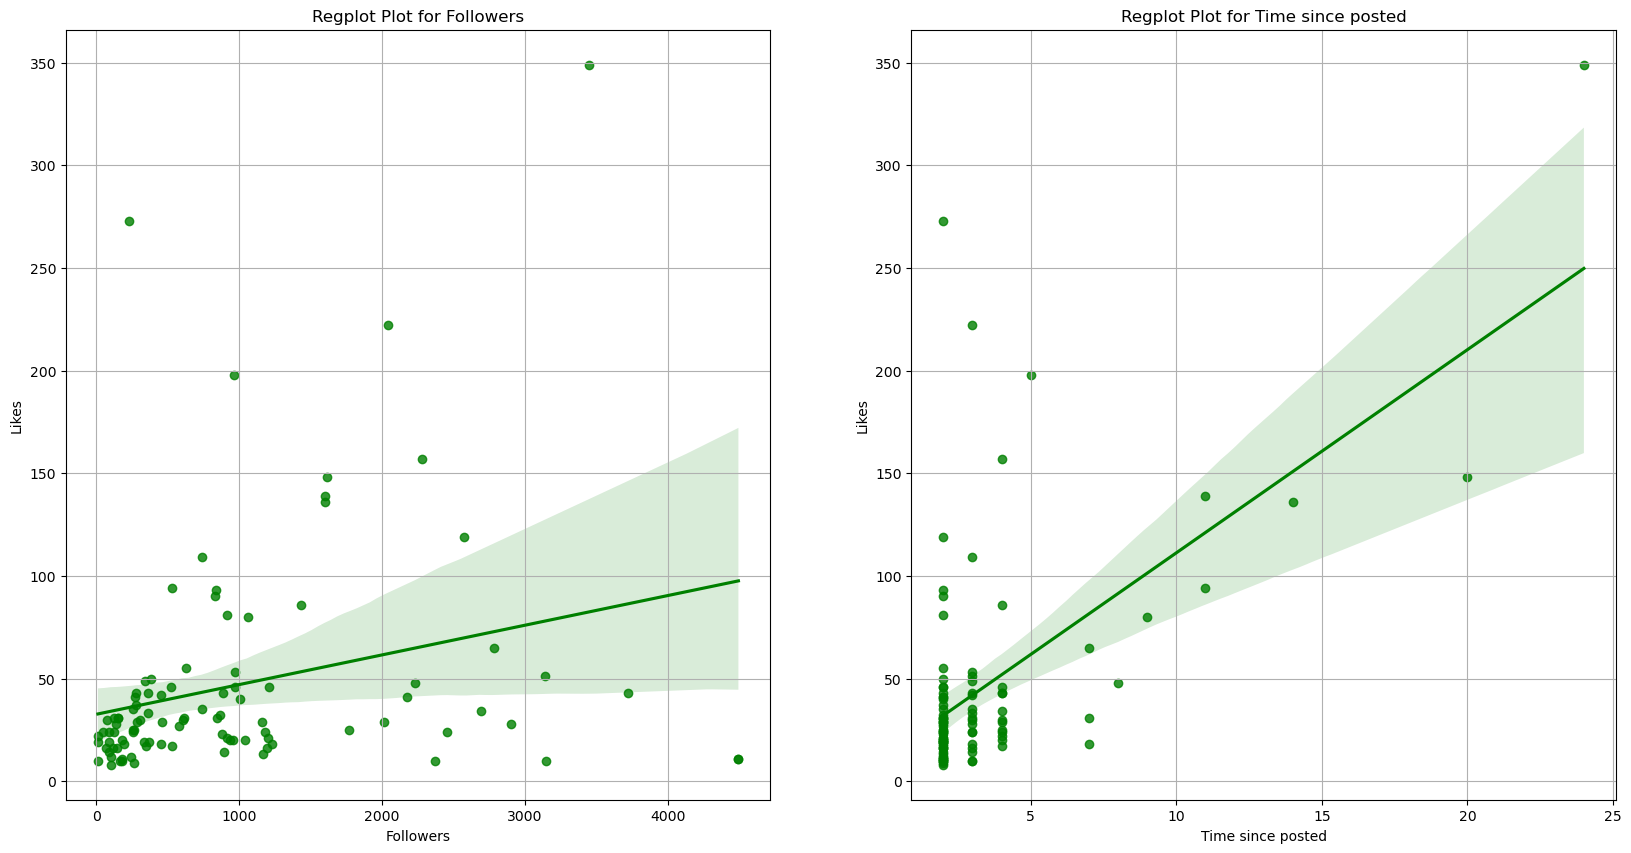

In [58]:
 #Scatter plot to display relationship between
# Likes and Followers
# Likes and Time since posted

PlotDataGiveConclusion2(['Followers', 'Time since posted'])

### Feature Selection

In [59]:
# Considering 'Followers' and 'Time Posted' as feature
# target be number of likes.

featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(df['Likes'], dtype = 'float32')


In [60]:
# Getting the maximum Likes

maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [61]:
#diving targets by max values

targets = targets/maxValLikes  # To get the data with in a range of 0-1

### Feature Scaling

In [63]:
# Standardizing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

### Model Building

In [64]:
# Making Gradeint Boosting Regressor model

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

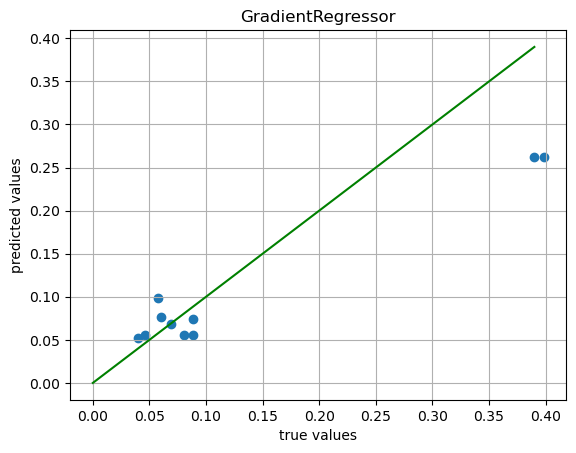

In [65]:
# Prediction, Plot

predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [66]:
# defining function to plot Likes and Time with respect to followers

def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

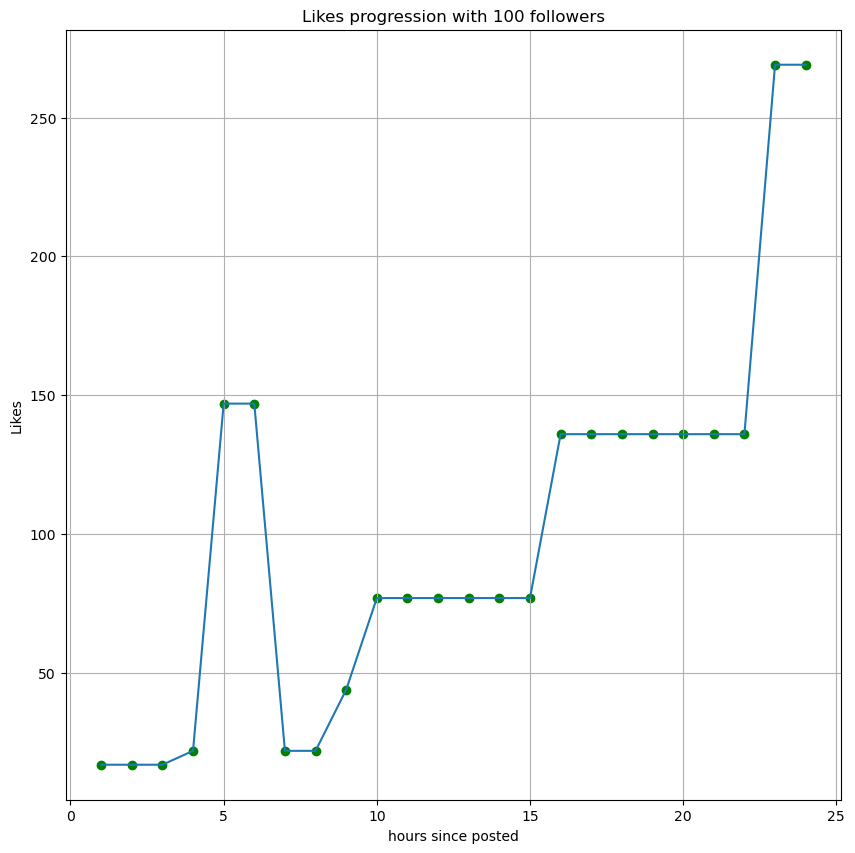

In [67]:
## Taking the Number of Followers as 100

PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

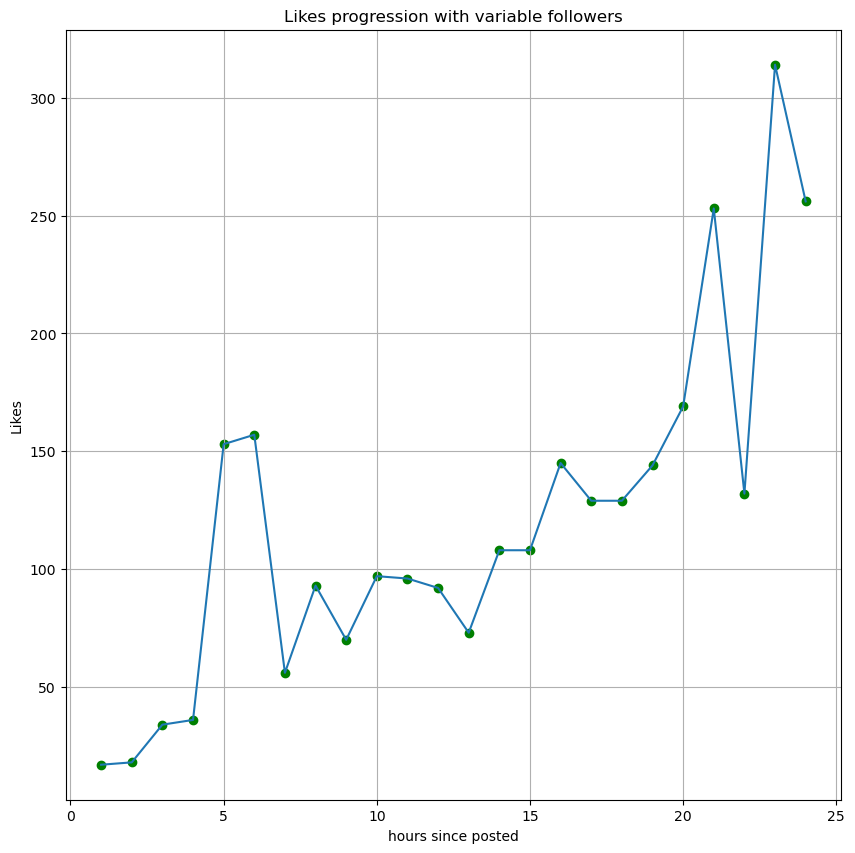

In [68]:
## Function to display likes with followers

def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)